# Praktikum 8: Minimierungsprobleme / Regression

## Aufgabe 1

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
x = np.array([i for i in range(0, 5)])
y = np.array([6, 12, 30, 80, 140])

# Ansatz: p2(x) = a*exp(x) + b
A = np.array([np.exp(x), np.ones(len(x))]).T
Q, R = np.linalg.qr(A)
p = np.linalg.solve(R, Q.T@y)
print(p)
print(np.linalg.norm(A@p - y))

[ 2.48688392 10.92953595]
22.325819290546917


In [61]:
y_ln = np.log(y)

A = np.array([np.ones(len(x)), x]).T
Q, R = np.linalg.qr(A)
p = np.linalg.solve(R, Q.T@y_ln)
print(p)
print(np.linalg.norm(A@p - y_ln))

[1.76092933 0.81968859]
0.21442538731008795


## Aufgabe 2

[3.5 2.3]
0.39999999999999974


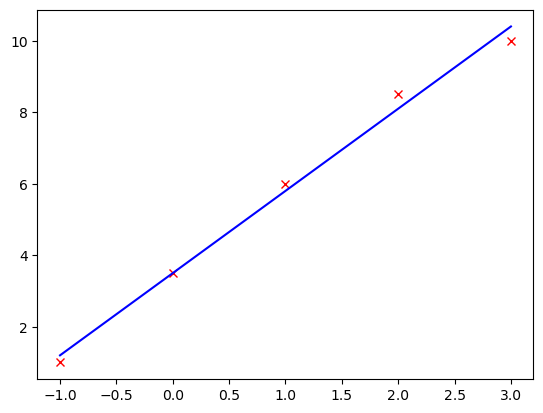

In [62]:
x = np.array([-1, 0, 1, 2, 3])
y = np.array([1, 3.5, 6, 8.5, 10])

A = np.array([np.ones(len(x)), x]).T
Q, R = np.linalg.qr(A)
p = np.linalg.solve(R, Q.T@y)

print(p)
print(np.linalg.norm(A@p - y)**2)

fig, ax = plt.subplots()
ax.plot(x, y, 'rx')
ax.plot(x, A@p, 'b-')
plt.show()

[6.5  0.75]
0.875


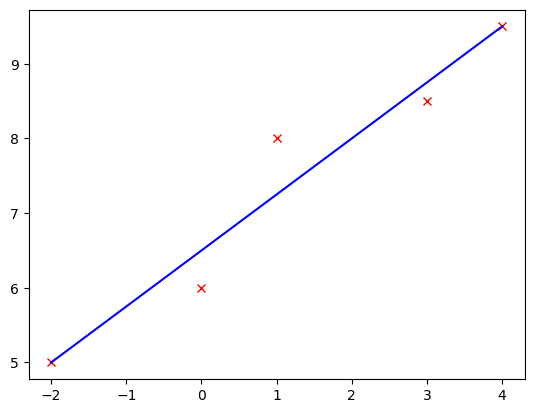

In [63]:
x = np.array([-2, 0, 1, 3, 4])
y = np.array([5, 6, 8, 8.5, 9.5])

A = np.array([np.ones(len(x)), x]).T
Q, R = np.linalg.qr(A)
p = np.linalg.solve(R, Q.T@y)

print(p)
print(np.linalg.norm(A@p - y)**2)

fig, ax = plt.subplots()
ax.plot(x, y, 'rx')
ax.plot(x, A@p, 'b-')
plt.show()

## Aufgabe 3

[[ 5.  5. 15.]
 [ 5. 15. 35.]
 [15. 35. 99.]]@p = [ 84. 195. 537.]


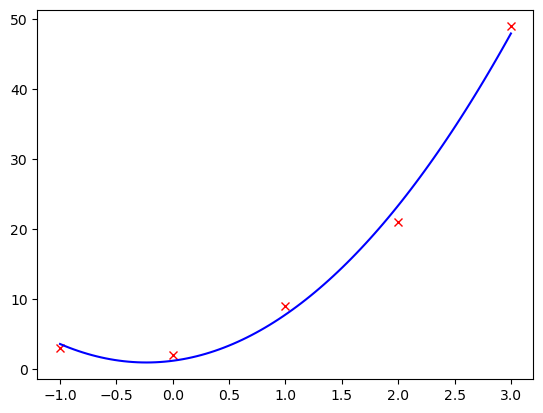

In [64]:
x = np.array([-1, 0, 1, 2, 3])
y = np.array([3, 2, 9, 21, 49])

A = np.array([np.ones(len(x)), x, x**2]).T
Q, R = np.linalg.qr(A)
p = np.linalg.solve(R, Q.T@y)

print(f'{A.T@A}@p = {A.T@y}')

xp = np.linspace(-1, 3, 100)
yp = np.polyval(p[::-1], xp)

fig, ax = plt.subplots()
ax.plot(x, y, 'rx')
ax.plot(xp, yp, 'b-')
plt.show()

## Aufgabe 4

[[ 30.  90.]
 [ 90. 299.]]@p = [272. 877.]
Fehlerquadratsumme: 8.556321839080464
f(6) = 19.9132317746355


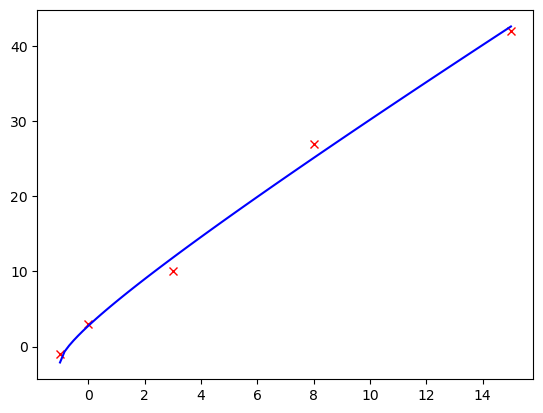

In [65]:
x = np.array([-1, 0, 3, 8, 15])
y = np.array([-1, 3, 10, 27, 42])

A = np.array([np.sqrt(x + 1), x]).T
Q, R = np.linalg.qr(A)
p = np.linalg.solve(R, Q.T@y)
print(f'{A.T@A}@p = {A.T@y}')
print(f'Fehlerquadratsumme: {np.linalg.norm(A@p - y)**2}')
x_6 = p[0]*np.sqrt(7) + p[1]*6
print(f'f(6) = {x_6}')

xp = np.linspace(-1, 15, 100)
yp = lambda x_n: p[0]*np.sqrt(x_n + 1) + p[1]*x_n

fig, ax = plt.subplots()
ax.plot(x, y, 'rx')
ax.plot(xp, yp(xp), 'b-')
plt.show()

## Aufgabe 5

[[3807.52905845   94.73996848]
 [  94.73996848    5.        ]]@p = [10125.55251556   268.        ]
Fehlerquadratsumme: 55.09329578804584


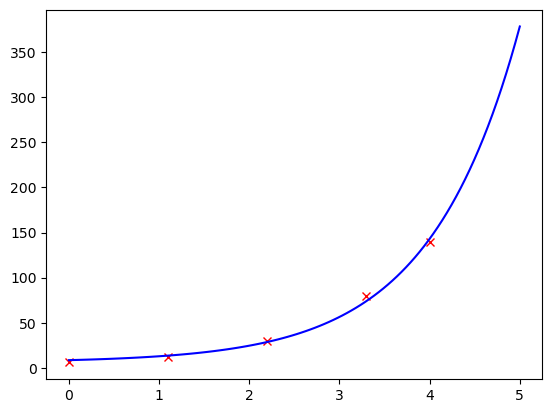

In [66]:
x = np.array([0, 1.1, 2.2, 3.3, 4])
y = np.array([6, 12, 30, 80, 140])

A = np.array([np.exp(x), np.ones(len(x))]).T
Q, R = np.linalg.qr(A)
p = np.linalg.solve(R, Q.T@y)
print(f'{A.T@A}@p = {A.T@y}')
print(f'Fehlerquadratsumme: {np.linalg.norm(A@p - y)**2}')

xp = np.linspace(0, 5, 100)
yp = p[0]*np.exp(xp) + p[1]

fig, ax = plt.subplots()
ax.plot(x, y, 'rx')
ax.plot(xp, yp, 'b-')
plt.show()

## Aufgabe 6

### a)

In [67]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([9.1, 4.1, 2.4, 1.7, 1.1, 0.7])

A = np.array([np.exp(-x), np.ones(len(x))]).T
Q, R = np.linalg.qr(A)
p_1 = np.linalg.solve(R, Q.T@y)

print(f'{A.T@A}@p = {A.T@y}')
print(f'Fehlerquadratsumme: {np.linalg.norm(A@p_1 - y)**2}')

xp_1 = np.linspace(0, 5, 50)
yp_1 = p_1[0]*np.exp(-xp_1) + p_1[1]

[[1.15651054 1.57805538]
 [1.57805538 6.        ]]@p = [11.04261217 19.1       ]
Fehlerquadratsumme: 0.305771860936582


### b)

In [68]:
A = np.array([1/(1 + x), np.ones(len(x))]).T
Q, R = np.linalg.qr(A)
p_2 = np.linalg.solve(R, Q.T@y)

print(f'{A.T@A}@p = {A.T@y}')
print(f'Fehlerquadratsumme: {np.linalg.norm(A@p_2 - y)**2}')

xp_2 = np.linspace(0, 5, 50)
yp_2 = p_2[0]/(1 + xp_2) + p_2[1]

[[1.49138889 2.45      ]
 [2.45       6.        ]]@p = [12.71166667 19.1       ]
Fehlerquadratsumme: 0.015539839698255526


### c)

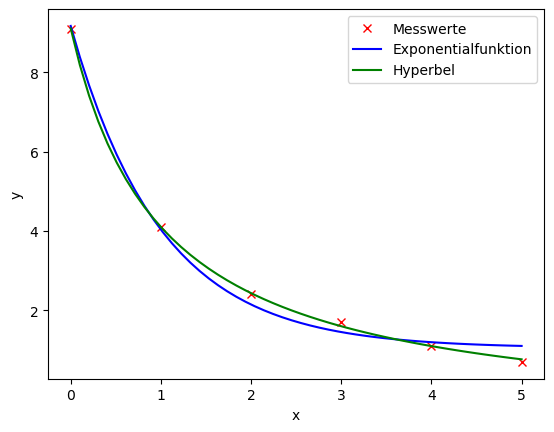

In [69]:
fig, ax = plt.subplots()
ax.plot(x, y, 'rx')
ax.plot(xp_1, yp_1, 'b-')
ax.plot(xp_2, yp_2, 'g-')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(['Messwerte', 'Exponentialfunktion', 'Hyperbel'])
plt.show()

### d)

Die Hyperbel ist besser geeignet, da sie die Messwerte besser beschreibt und die Fehlerquadratsumme kleiner ist.

## Aufgabe 7

### a)

In [70]:
# R = R_0 * (1 + a * (T - T_0))
# R = R_0 + B * (T - T_0) mit B = R_0 * a
t = np.array([20, 100, 180, 260, 340, 420, 500])
t_0 = 20
r = np.array([500, 676, 870, 1060, 1205, 1410, 1565])
A = np.array([np.ones(len(t)), t - t_0]).T
Q, R = np.linalg.qr(A)
p = np.linalg.solve(R, Q.T@r)

print(f'{A.T@A}@p = {A.T@r}')
print(f'Fehlerquadratsumme: {np.linalg.norm(A@p - r)**2}')
print(f'R_0 = {p[0]}, B = {p[1]}, A = {p[1]/p[0]}')

[[7.000e+00 1.680e+03]
 [1.680e+03 5.824e+05]]@p = [   7286. 2148480.]
Fehlerquadratsumme: 997.8571428571423
R_0 = 505.35714285714283, B = 2.23125, A = 0.004415194346289753


### b)

In [71]:
npp = np.polyfit(t-t_0, r, 1)

### c)

R(300) = 1130.1071428571431
R(300) = 1130.1071428571431


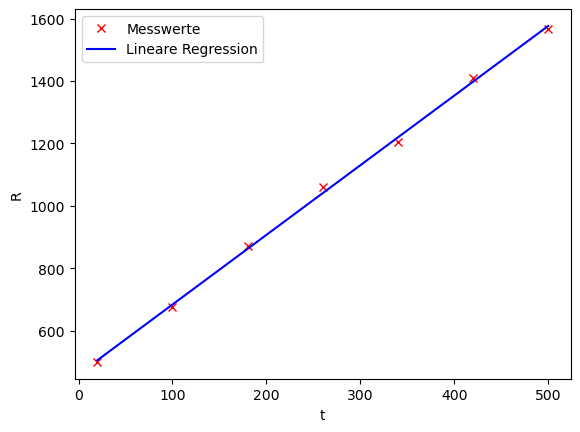

In [72]:
# R = 300
print(f'R(300) = {np.polyval(npp, 300-t_0)}')
print(f'R(300) = {npp[1] + npp[0]*(300-t_0)}')

# Plot
fig, ax = plt.subplots()
ax.plot(t, r, 'rx')
ax.plot(t, A@p, 'b-')
ax.set_xlabel('t')
ax.set_ylabel('R')
ax.legend(['Messwerte', 'Lineare Regression'])
plt.show()